# Lambda School, Intro to Data Science, Day 4

## Inferential Statistics Assignment

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
df.dropna(subset=features, inplace=True)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [9]:
df.age.unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
age = [22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74. ]
mean(age)

33.71693181818182

In [11]:
df.fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,  51.8625,
        21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,  31.275 ,
         7.8542,  16.    ,  29.125 ,  18.    ,  26.    ,  13.    ,
         8.0292,  35.5   ,  31.3875, 263.    ,  27.7208,  10.5   ,
        82.1708,  52.    ,  11.2417,   9.475 ,  21.    ,  41.5792,
         7.8792,  17.8   ,  39.6875,   7.8   ,  76.7292,  61.9792,
         7.2292,  27.75  ,  46.9   ,  80.    ,  83.475 ,  27.9   ,
         8.1583,   8.6625,  73.5   ,  14.4542,  56.4958,   7.65  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,  47.1   ,  15.85  ,
        34.375 ,  61.175 ,  20.575 ,  34.6542,  63.3583,  23.    ,
         7.8958,  77.2875,   8.6542,   9.825 ,  14.4583,   7.75  ,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  36.75  ,
         7.7958,  12.525 ,  66.6   ,  61.3792,   7.7333,  16.1   ,
        15.75  ,   7.775 ,  20.525 ,  33.5   ,  30.6958,  28.7

In [13]:
fare = [  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,  51.8625,
        21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,  31.275 ,
         7.8542,  16.    ,  29.125 ,  18.    ,  26.    ,  13.    ,
         8.0292,  35.5   ,  31.3875, 263.    ,  27.7208,  10.5   ,
        82.1708,  52.    ,  11.2417,   9.475 ,  21.    ,  41.5792,
         7.8792,  17.8   ,  39.6875,   7.8   ,  76.7292,  61.9792,
         7.2292,  27.75  ,  46.9   ,  80.    ,  83.475 ,  27.9   ,
         8.1583,   8.6625,  73.5   ,  14.4542,  56.4958,   7.65  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,  47.1   ,  15.85  ,
        34.375 ,  61.175 ,  20.575 ,  34.6542,  63.3583,  23.    ,
         7.8958,  77.2875,   8.6542,   9.825 ,  14.4583,   7.75  ,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  36.75  ,
         7.7958,  12.525 ,  66.6   ,  61.3792,   7.7333,  16.1   ,
        15.75  ,   7.775 ,  20.525 ,  33.5   ,  30.6958,  28.7125,
         0.    ,  39.    ,  22.025 ,  15.5   , 146.5208,   8.4042,
         6.4958,   7.225 ,  10.4625,  18.7875,  31.    , 113.275 ,
        27.    ,  76.2917,  90.    ,   9.35  ,  13.5   ,  26.25  ,
        12.275 ,   7.125 ,  52.5542,  20.2125,  15.2458,  86.5   ,
       512.3292,  79.65  , 153.4625, 135.6333,  19.5   ,  29.7   ,
        77.9583,  20.25  ,  78.85  ,  91.0792,  12.875 ,   8.85  ,
       151.55  , 108.9   ,  24.    ,  56.9292,  83.1583, 262.375 ,
        14.    , 164.8667, 134.5   ,  12.35  ,   6.2375,  57.9792,
        28.5   ,  15.9   ,   9.225 ,  55.    ,  75.25  ,  69.3   ,
        55.4417, 211.5   ,   4.0125, 227.525 ,  15.7417,  12.    ,
       120.    ,  12.65  ,  18.75  ,  32.5   ,  24.15  ,   7.875 ,
        14.4   ,  55.9   ,  81.8583,  19.2583,  30.5   ,  89.1042,
        38.5   ,  13.7917,   9.8375,   7.0458,   7.5208,  12.2875,
         9.5875,  49.5042,  78.2667,  22.525 ,  26.2875,  59.4   ,
         7.4958,  34.0208,  93.5   , 106.425 ,  49.5   ,  71.    ,
       110.8833,  39.6   ,  17.4   ,  51.4792,  26.3875,  30.    ,
        40.125 ,  15.    ,  15.55  ,  65.    ,  32.3208,   7.0542,
         7.55  ,   8.4333, 133.65  ,  25.5875,   9.8417,  10.1708,
       211.3375,  57.    ,  13.4167,   7.7417,   9.4833,  33.    ,
         8.3625,  25.9292,   8.6833,   8.5167,   7.8875,  37.0042,
         6.45  ,   8.3   ,   6.4375,  39.4   ,  14.1083,  13.8583,
        50.4958,   5.    ,   9.8458,  10.5167]
mean(fare)

42.41134454545455

In [14]:
stdev(age)

21.081342699607305

In [15]:
stdev(fare)

56.71144886855476

Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

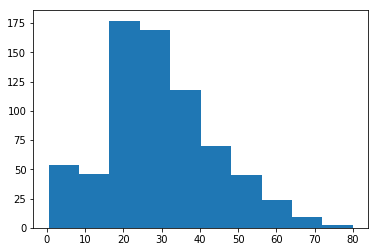

In [21]:
from matplotlib.pyplot import hist

hist(df.age)

(array([577.,  89.,  28.,   2.,   9.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

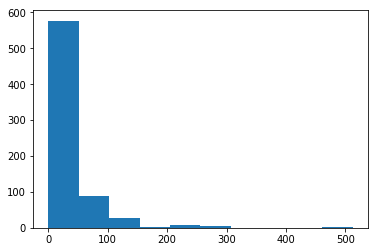

In [22]:
from matplotlib.pyplot import hist

hist(df.fare)

# Clumsy Carl

Re-do the Clumsy Carl problem -- but suppose that Carl broke **2** of 5 dishes. What's the p-value?

Think, and be ready to discuss: Would you reject the null hypothesis?

Suggestion: You can look at the lecture notebook, but **don't copy-paste** from it!

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

---

Here's the problem restated:

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


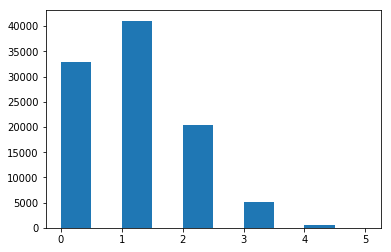

In [32]:
def test():
  dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']
  breakers = [random.choice(dishwashers) for broken_dish in range(5)]
  return breakers.count('Carl')

tests = [test() for _ in range(100000)]

plt.hist(tests);

In [33]:
mean(tests), stdev(tests)

(0.9964, 0.8926337479336526)

In [34]:
standard_score = (2 - mean(tests)) / stdev(tests)
print(standard_score)

1.1243133057911174


In [35]:
sum(test >= 2 for test in tests)

26066

In [37]:
sum(test >= 2 for test in tests) / len(tests)

0.26066

In [38]:
p_value = mean(test >= 2 for test in tests)
print(p_value)

0.26066


In [39]:
p_value < .05

False

# Two dice

Simulate the distribution of adding two dice.

What is the mean? Standard deviation?

In [0]:
def dice(n):
    total = 0
    for i in range(n):
        total += random.randint(1, 6)
    return total

In [45]:
dice(5)

11

What is the standard score (z score) of rolling a 10?

In [46]:
dice(10)

33

What is the probability of rolling a 10 or higher?

# Harvest

Using bootstrap resampling, calculate the 95% confidence interval for mean apple weight ...

In [0]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round((len(x) - 1) * p/100)
    return sorted(x)[i]

apples = [.5, .4, .5, .6, .3, .7]

... and for mean pumpkin weight:

In [0]:
pumpkins = [1, 1, 1, 3, 3, 591]